# ASSIGNMENT 2

Nama : Muhammad Rafi Ramadhan <br>
<br>
Kelas : PYTN-KS-012 <br>
<br>
Kode Peserta : PYTN-KS12-002 <br>

## Project Overview

The dataset used in this project is NYC Property Sales Dataset from Kaggle. This dataset is a record of every building or building unit (apartment, etc.) sold in the New York City property market over a 12-month period.

This dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:

- BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
*BLOCK; LOT: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
+BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE: The type of building at various points in time.

Note that because this is a financial transaction dataset, there are some points that need to be kept in mind:

- Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.
- This dataset uses the financial definition of a building/building unit, for tax purposes. In case a single entity owns the building in question, a sale covers the value of the entire building. In case a building is owned piecemeal by its residents (a condominium), a sale refers to a single apartment (or group of apartments) owned by some individual.

## Import Library

Lakukan penginstallan library library yang akan di gunakan dalam assignment kali ini

Kemudian Import library yang akan digunakan kedalam notebook

In [1]:
#untuk pemrosesan data
import pandas as pd
import numpy as np

#untuk keperluan plotting
import matplotlib.pyplot as plt
import seaborn as sns

#analisis statistik
import scipy.stats
from scipy import stats
import scipy.stats as scistats
import statsmodels.api as sm
import math
import statistics

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## Data Loading

Melakukan import dataset yang akan digunakan kedalam notebook, lalu melakukan pengecekan isi serta masing masing elemen dari masing-masing kolom secara sekilas.

In [2]:
data = pd.read_csv("E:/Kuliah/Semester 6/Hacktiv8/Python Assignment/2/nyc-rolling-sales.csv", skipinitialspace = True)
data.head(5)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,NaN,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,NaN,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,NaN,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,NaN,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,NaN,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


Catatan : <br>
1. BOROUGH: Kode digit untuk wilayah tempat properti berada; arti kode ini adalah Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), dan Staten Island (5).<br>
2. NEIGHBORHOOD: Nama lingkungan dalam proses penilaian properti.<br>
3. BUILDING CLASS CATEGORY: Ini adalah bidang yang kami sertakan agar pengguna File Penjualan Bergulir dapat dengan mudah mengidentifikasi properti serupa dengan penggunaan luas(mis. Rumah Satu Keluarga) tanpa melihat ke atas Kelas Bangunan individu.<br>
4. TAX CLASS AT PRESENT: Setiap properti di kota ditetapkan ke salah satu dari empat kelas pajak (Kelas 1, 2, 3, dan 4), berdasarkan penggunaan properti tersebut.<br>
5. BLOCK: Blok Pajak adalah sub-divisi wilayah tempat properti sebenarnya berada.<br>
6. LOT: Lot Pajak adalah subdivisi dari Blok Pajak dan mewakili lokasi unik properti.<br>
7. EASE-MENT: Merupakan hak, seperti hak jalan, yang memungkinkan entitas untuk memanfaatkan properti riil orang lain secara terbatas..<br>
8. ADDRESS: Alamat jalan properti seperti yang tercantum pada File Penjualan.<br>
9. APARTMENT NUMBER: Nomor apartemen <br>
10. ZIP CODE: Kode pos properti <br>
11. RESIDENTIAL UNITS: Jumlah unit hunian di properti yang terdaftar.<br>
12. COMMERCIAL UNITS: Jumlah unit komersial di properti yang terdaftar.<br>
13. TOTAL UNITS: Jumlah total unit di properti yang terdaftar.<br>
14. LAND SQUARE FEET: Luas tanah properti tercantum dalam persegi.<br>
15. GROSS SQUARE FEET: Luas total semua lantai bangunan yang diukur dari permukaan luar bangunan dinding luar bangunan, termasuk luas tanah dan ruang di dalam setiap bangunan atau struktur di properti
16. YEAR BUILT: Tahun bangunan di properti itu dibangun. <br>
17.TAX CLASS AT TIME OF SALE: -
18.BUILDING CLASS AT PRESENT dan BUILDING CLASS AT TIME OF SALE: Klasifikasi Bangunan digunakan untuk menggambarkan penggunaan konstruktif properti. <br>
19.SALE PRICE: Harga yang dibayarkan untuk properti. <br>
20.SALE DATE: Tanggal properti terjual. <br>
21. BUILDING CLASS AT PRESENT: Klasifikasi Bangunan digunakan untuk menggambarkan penggunaan konstruktif properti.<br>

In [3]:
#Menampilkan nilai kolom 

data.columns.values

array(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER',
       'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'], dtype=object)

In [4]:
#Mengetahui bentuk data
data.shape

(84548, 22)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      84548 non-null  int64  
 1   BOROUGH                         84548 non-null  int64  
 2   NEIGHBORHOOD                    84548 non-null  object 
 3   BUILDING CLASS CATEGORY         84548 non-null  object 
 4   TAX CLASS AT PRESENT            83810 non-null  object 
 5   BLOCK                           84548 non-null  int64  
 6   LOT                             84548 non-null  int64  
 7   EASE-MENT                       0 non-null      float64
 8   BUILDING CLASS AT PRESENT       83810 non-null  object 
 9   ADDRESS                         84548 non-null  object 
 10  APARTMENT NUMBER                19052 non-null  object 
 11  ZIP CODE                        84548 non-null  int64  
 12  RESIDENTIAL UNITS               

In [6]:
#Melihat Gambaran dasar dari data bertipe object
data.describe(include = 'O').transpose()

,count,unique,top,freq
NEIGHBORHOOD,84548,254,FLUSHING-NORTH,3068
BUILDING CLASS CATEGORY,84548,47,01 ONE FAMILY DWELLINGS,18235
TAX CLASS AT PRESENT,83810,10,1,38633
BUILDING CLASS AT PRESENT,83810,166,D4,12663
ADDRESS,84548,67563,131-05 40TH ROAD,210
APARTMENT NUMBER,19052,3988,4,298
LAND SQUARE FEET,84548,6062,-,26252
GROSS SQUARE FEET,84548,5691,-,27612
BUILDING CLASS AT TIME OF SALE,84548,166,R4,12989
SALE PRICE,84548,10008,-,14561


In [7]:
#Melihat Gambaran dasar dari data bertipe integer
data.describe(include = 'int').transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,84548.0,10344.359878,7151.779436,4.0,4231.00,8942.0,15987.25,26739.0
BOROUGH,84548.0,2.998758,1.289790,1.0,2.00,3.0,4.00,5.0
BLOCK,84548.0,4237.218976,3568.263407,1.0,1322.75,3311.0,6281.00,16322.0
LOT,84548.0,376.224015,658.136814,1.0,22.00,50.0,1001.00,9106.0
ZIP CODE,84548.0,10731.991614,1290.879147,0.0,10305.00,11209.0,11357.00,11694.0
RESIDENTIAL UNITS,84548.0,2.025264,16.721037,0.0,0.00,1.0,2.00,1844.0
COMMERCIAL UNITS,84548.0,0.193559,8.713183,0.0,0.00,0.0,0.00,2261.0
TOTAL UNITS,84548.0,2.249184,18.972584,0.0,1.00,1.0,2.00,2261.0
YEAR BUILT,84548.0,1789.322976,537.344993,0.0,1920.00,1940.0,1965.00,2017.0
TAX CLASS AT TIME OF SALE,84548.0,1.657485,0.819341,1.0,1.00,2.0,2.00,4.0


## Data Cleaning

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      84548 non-null  int64  
 1   BOROUGH                         84548 non-null  int64  
 2   NEIGHBORHOOD                    84548 non-null  object 
 3   BUILDING CLASS CATEGORY         84548 non-null  object 
 4   TAX CLASS AT PRESENT            83810 non-null  object 
 5   BLOCK                           84548 non-null  int64  
 6   LOT                             84548 non-null  int64  
 7   EASE-MENT                       0 non-null      float64
 8   BUILDING CLASS AT PRESENT       83810 non-null  object 
 9   ADDRESS                         84548 non-null  object 
 10  APARTMENT NUMBER                19052 non-null  object 
 11  ZIP CODE                        84548 non-null  int64  
 12  RESIDENTIAL UNITS               

In [9]:
#Mengecek apakah ada missing value
data.isnull().sum()

Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
EASE-MENT                         84548
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
APARTMENT NUMBER                  65496
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                      0
GROSS SQUARE FEET                     0
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                            0
SALE DATE                             0
dtype: int64

In [10]:
for col in data.columns:
    print("UNIQUE VALUES FOR ",col)
    print("="*30)
    print(data[col].unique())
    print("="*30)

UNIQUE VALUES FOR  Unnamed: 0
[    4     5     6 ... 26737 26738 26739]
UNIQUE VALUES FOR  BOROUGH
[1 2 3 4 5]
UNIQUE VALUES FOR  NEIGHBORHOOD
['ALPHABET CITY' 'CHELSEA' 'CHINATOWN' 'CIVIC CENTER' 'CLINTON'
 'EAST VILLAGE' 'FASHION' 'FINANCIAL' 'FLATIRON' 'GRAMERCY'
 'GREENWICH VILLAGE-CENTRAL' 'GREENWICH VILLAGE-WEST' 'HARLEM-CENTRAL'
 'HARLEM-EAST' 'HARLEM-UPPER' 'HARLEM-WEST' 'INWOOD' 'JAVITS CENTER'
 'KIPS BAY' 'LITTLE ITALY' 'LOWER EAST SIDE' 'MANHATTAN VALLEY'
 'MIDTOWN CBD' 'MIDTOWN EAST' 'MIDTOWN WEST' 'MORNINGSIDE HEIGHTS'
 'MURRAY HILL' 'ROOSEVELT ISLAND' 'SOHO' 'SOUTHBRIDGE' 'TRIBECA'
 'UPPER EAST SIDE (59-79)' 'UPPER EAST SIDE (79-96)'
 'UPPER EAST SIDE (96-110)' 'UPPER WEST SIDE (59-79)'
 'UPPER WEST SIDE (79-96)' 'UPPER WEST SIDE (96-116)'
 'WASHINGTON HEIGHTS LOWER' 'WASHINGTON HEIGHTS UPPER' 'BATHGATE'
 'BAYCHESTER' 'BEDFORD PARK/NORWOOD' 'BELMONT' 'BRONX PARK' 'BRONXDALE'
 'CASTLE HILL/UNIONPORT' 'CITY ISLAND' 'CITY ISLAND-PELHAM STRIP'
 'CO-OP CITY' 'COUNTRY CLUB' 'CR

['6625000' '-  ' '3936272' ... '408092' '11693337' '69300']
UNIQUE VALUES FOR  SALE DATE
['2017-07-19 00:00:00' '2016-12-14 00:00:00' '2016-12-09 00:00:00'
 '2016-09-23 00:00:00' '2016-11-17 00:00:00' '2017-07-20 00:00:00'
 '2017-06-20 00:00:00' '2016-11-07 00:00:00' '2016-10-17 00:00:00'
 '2016-09-06 00:00:00' '2017-03-10 00:00:00' '2017-04-28 00:00:00'
 '2017-06-09 00:00:00' '2017-07-14 00:00:00' '2017-03-16 00:00:00'
 '2016-09-01 00:00:00' '2017-08-17 00:00:00' '2016-09-07 00:00:00'
 '2017-08-30 00:00:00' '2017-06-21 00:00:00' '2017-01-30 00:00:00'
 '2017-07-07 00:00:00' '2017-08-04 00:00:00' '2017-01-09 00:00:00'
 '2017-04-18 00:00:00' '2017-06-19 00:00:00' '2017-08-28 00:00:00'
 '2017-05-10 00:00:00' '2016-12-02 00:00:00' '2017-01-31 00:00:00'
 '2017-06-28 00:00:00' '2016-12-07 00:00:00' '2017-08-24 00:00:00'
 '2017-06-27 00:00:00' '2017-03-17 00:00:00' '2017-06-14 00:00:00'
 '2017-01-17 00:00:00' '2017-01-11 00:00:00' '2017-04-21 00:00:00'
 '2017-06-29 00:00:00' '2016-10-05 00:00

Dari nilai unik di atas, terlihat bahwa terdapat data yang kurang logis untuk digunakan, seperti LAND SQUARE FEET, GROSS SQUARE FEET, YEAR BUILT, dan TOTAL UNITS yang memiliki nilai 0 karena tidak mungkin luas suatu bangunan atau tahun dibangunnya suatu bangunan bernilai 0, sehingga nilai tersebut akan dihilangkan dari data.

In [11]:
data = data[(data["LAND SQUARE FEET"] != 0) & 
            (data["GROSS SQUARE FEET"] != 0) & 
            (data["YEAR BUILT"] != 0) & 
            (data["SALE PRICE"] != 0) & 
            (data["TOTAL UNITS"] != 0)
           ]

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60714 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      60714 non-null  int64  
 1   BOROUGH                         60714 non-null  int64  
 2   NEIGHBORHOOD                    60714 non-null  object 
 3   BUILDING CLASS CATEGORY         60714 non-null  object 
 4   TAX CLASS AT PRESENT            60714 non-null  object 
 5   BLOCK                           60714 non-null  int64  
 6   LOT                             60714 non-null  int64  
 7   EASE-MENT                       0 non-null      float64
 8   BUILDING CLASS AT PRESENT       60714 non-null  object 
 9   ADDRESS                         60714 non-null  object 
 10  APARTMENT NUMBER                15083 non-null  object 
 11  ZIP CODE                        60714 non-null  int64  
 12  RESIDENTIAL UNITS               

Dari informasi tersebut, dapat dilihat bahwa pada kolom YEAR BUILT memiliki nilai 0 sehingga diubah dahulu menjadi NaN. Selanjutnya, kolom Unnamed: 0 harus dihapus karena tidak related dengan proses analitis. Lalu kolom EASE-MENT tidak mengandung informasi yang dibutuhkan untuk analisis begitupun kolom ADDRESS, APARTMENT NUMBER, dan ZIP CODE sebagai kolom yang tidak diperlukan untuk analisis berikutnya, sehingga keempat kolom tersebut juga dihapus/dibuang.

In [13]:
#mengganti 0 di YEAR BUILT dengan np.nan
data['YEAR BUILT'].replace(0, np.nan, inplace=True)


In [14]:
#menghapus kolom 'Unnamed: 0' karena tidak related dengan proses analitis
data.drop("Unnamed: 0", axis = 1, inplace = True)

In [15]:
#menghapus kolom 'EASE-MENT' karena tidak memiliki informasi/nilai
data.drop('EASE-MENT', axis = 1, inplace = True)

In [16]:
# menghapus kolom-kolom yang tidak relevan dengan analisis data statistik
data.drop(labels=['ADDRESS','APARTMENT NUMBER', 'ZIP CODE'], axis=1, inplace=True)

In [17]:
#'SALE PRICE' harus numerik, missing value diatur ke NaN
data['SALE PRICE']= pd.to_numeric(data['SALE PRICE'], errors='coerce')

# 'LAND SQUARE FEET' dan 'GROSS SQUARE FEET' harus numeric
data['LAND SQUARE FEET'] = pd.to_numeric(data['LAND SQUARE FEET'], errors='coerce')
data['GROSS SQUARE FEET'] = pd.to_numeric(data['GROSS SQUARE FEET'], errors='coerce')

# 'SALE DATE' harus datetime
data['SALE DATE']=pd.to_datetime(data['SALE DATE'], errors='coerce')

# kolom yang harus kategorikal
categorical = ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT',
               'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE', 'YEAR BUILT']
for col in categorical:
    data[col] = data[col].astype('category')

In [18]:
#menghapus semua null values pada kolom dibawah ini
data = data[data['LAND SQUARE FEET'].notnull()]
data = data[data['GROSS SQUARE FEET'].notnull()]
data = data[data['SALE PRICE'].notnull()]

In [19]:
data.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07


### Mengecek apakah terdapat data duplikat

In [20]:
#menghitung jumlah baris yang duplikat
sum(data.duplicated())

335

In [21]:
data[data.duplicated()]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
208,1,CHELSEA,01 ONE FAMILY DWELLINGS,1,772,29,A4,1,0,1,1588.0,5653.0,1900,1,A4,10.0,2017-01-30
209,1,CHELSEA,01 ONE FAMILY DWELLINGS,1,772,29,A4,1,0,1,1588.0,5653.0,1900,1,A4,10.0,2017-01-30
4173,1,GREENWICH VILLAGE-WEST,01 ONE FAMILY DWELLINGS,1,585,69,A5,1,0,1,384.0,1152.0,1901,1,A5,1375000.0,2016-10-07
5005,1,HARLEM-CENTRAL,08 RENTALS - ELEVATOR APARTMENTS,2,1737,25,D3,771,0,771,189025.0,555954.0,1959,2,D3,5020000.0,2016-11-07
5006,1,HARLEM-CENTRAL,08 RENTALS - ELEVATOR APARTMENTS,2,1737,25,D3,771,0,771,189025.0,555954.0,1959,2,D3,5020000.0,2016-11-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83176,5,TODT HILL,01 ONE FAMILY DWELLINGS,1,908,150,A1,1,0,1,38862.0,3900.0,1920,1,A1,1125000.0,2017-08-02
83207,5,TOMPKINSVILLE,02 TWO FAMILY DWELLINGS,1,114,30,B2,2,0,2,5781.0,844.0,1942,1,B2,250000.0,2017-06-22
83603,5,WEST NEW BRIGHTON,01 ONE FAMILY DWELLINGS,1,91,31,A1,1,0,1,4840.0,2400.0,2005,1,A1,585000.0,2016-09-21
83647,5,WEST NEW BRIGHTON,01 ONE FAMILY DWELLINGS,1,155,180,A1,1,0,1,10671.0,2464.0,1899,1,A1,725000.0,2017-06-30


Karena terdapat 403 data yang duplikat, maka data duplikat tersebut akan dihapus dari dataset

In [22]:
#menghapus/membuang baris yang duplikat
data.drop_duplicates(subset = data.columns, keep='first', inplace=True)

#memastikan kembali jumlah baris kolom dan baris setelah drop (final)
data.shape

(41089, 17)

Maka, setelah menyeleksi dan menghapus data yang duplikat (yaitu sebanyak 403 baris) didapatlah baris dan kolom final yang akan dianalisis yaitu sebanyak 47841 baris dan 17 kolom. Yang kemudian melakukan pengkategorian data sesuai dengan tipe data.

In [23]:
categorical = ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT',
               'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE', 'YEAR BUILT']  
float_columns = ['SALE PRICE', 'LAND SQUARE FEET', 'GROSS SQUARE FEET']
integer_columns = ['BLOCK', 'LOT']

# mengubah kolom yang seharusnya kategori menjadi tipe 'str'
for col in categorical:
    data[col] = data[col].astype('str')

# mengubah kolom yang seharusnya float menjadi tipe 'float'
for col in float_columns:
    data[col] = data[col].astype('float64')

# mengubah kolom yang seharusnya int menjadi tipe 'int'
for col in integer_columns:
    data[col] = data[col].astype('int64')

In [24]:
data.index = range(0,len(data))

In [25]:
data.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41089 entries, 0 to 41088
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         41089 non-null  object        
 1   NEIGHBORHOOD                    41089 non-null  object        
 2   BUILDING CLASS CATEGORY         41089 non-null  object        
 3   TAX CLASS AT PRESENT            41089 non-null  object        
 4   BLOCK                           41089 non-null  int64         
 5   LOT                             41089 non-null  int64         
 6   BUILDING CLASS AT PRESENT       41089 non-null  object        
 7   RESIDENTIAL UNITS               41089 non-null  int64         
 8   COMMERCIAL UNITS                41089 non-null  int64         
 9   TOTAL UNITS                     41089 non-null  int64         
 10  LAND SQUARE FEET                41089 non-null  float64       
 11  GR

In [27]:
data_std = pd.DataFrame(data['SALE PRICE'])
std = data_std.describe()
std

,SALE PRICE
count,4.108900e+04
mean,1.258914e+06
std,1.437938e+07
min,0.000000e+00
25%,1.450000e+05
50%,5.200000e+05
75%,8.650000e+05
max,2.210000e+09


### Mengecek apakah terdapat outlier pada kolom 'SALE PRICE' 

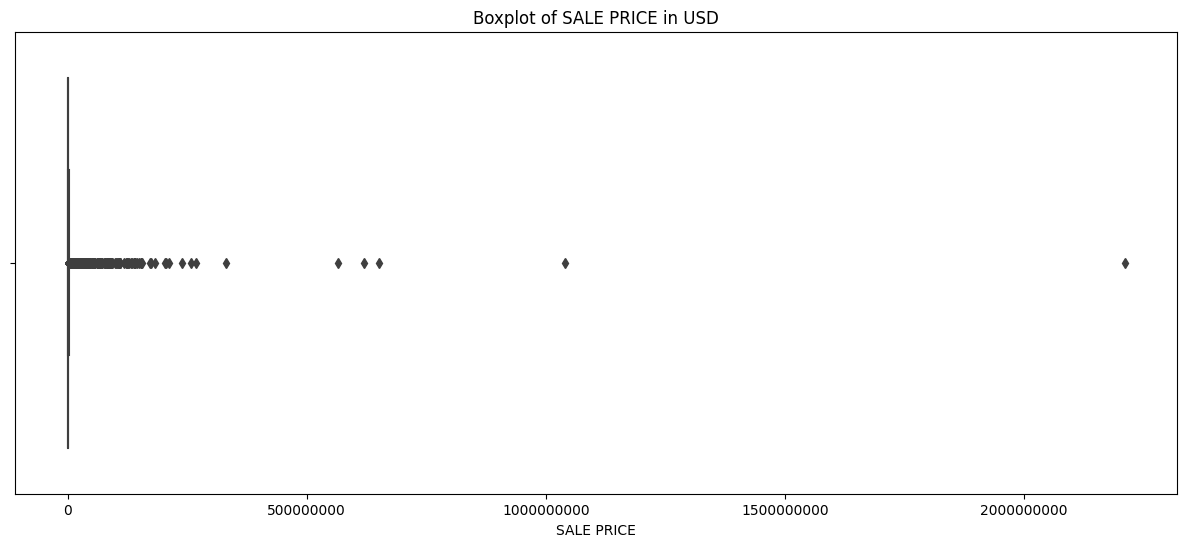

In [28]:
plt.figure(figsize=(15,6))


sns.boxplot(x='SALE PRICE', data=data)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of SALE PRICE in USD')
plt.show()

In [29]:
# Mengambil data SALE PRICE dalam rentang kurang dari 500000
housing = data[data['SALE PRICE'] < 500000]

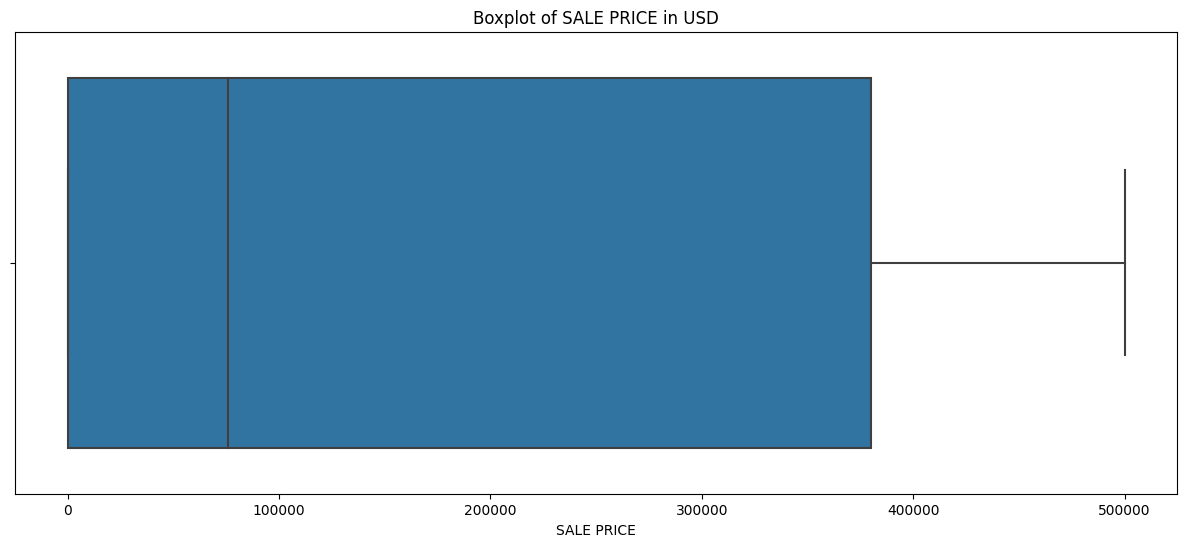

In [30]:
plt.figure(figsize=(15,6))

sns.boxplot(x='SALE PRICE', data=housing)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of SALE PRICE in USD')
plt.show()

Dapat dilihat dari box plot diatas, ketika sale price diatas 500000 maka outliers tidak ada, dan dapat diketahui bahwa whisker yang ada lumayan panjang namun tidak simetris dimana whisker atas lebih panjang daripada whisker bawah, begitu juga dengan median yang juga tidak simetris. Ketidaksimetrisan pada whisker dan median pada boxplot dapat memberikan indikasi bahwa distribusi data antara kelompok-kelompok tersebut tidak simetris. Hal ini dapat menunjukkan perbedaan dalam karakteristik data, seperti perbedaan dalam rentang variabilitas atau kecenderungan nilai. 

## Measure of Central Tendency

### Mean


In [31]:
mean_saleprice = statistics.mean(data['SALE PRICE'])
mean_lsf = statistics.mean(data['LAND SQUARE FEET'])
mean_gsf = statistics.mean(data['GROSS SQUARE FEET'])
print("Mean of Sale Price : ",mean_saleprice)
print("Mean of Land Square Feet : ",mean_lsf)
print("Mean of Gross Square Feet : ",mean_gsf)

Mean of Sale Price :  1258914.4056073402
Mean of Land Square Feet :  3547.3256589354814
Mean of Gross Square Feet :  4034.059845700796


### Median

In [32]:
median_saleprice = statistics.median(data['SALE PRICE'])
median_lsf = statistics.median(data['LAND SQUARE FEET'])
median_gsf = statistics.median(data['GROSS SQUARE FEET'])
print("Median of Sale Price : ",median_saleprice)
print("Median of Land Square Feet : ",median_lsf)
print("Median of Gross Square Feet : ",median_gsf)

Median of Sale Price :  520000.0
Median of Land Square Feet :  2375.0
Median of Gross Square Feet :  1836.0


### Mode

In [33]:
mode_borough            = statistics.mode(data['BOROUGH'])
mode_Neighborhood       = statistics.mode(data['NEIGHBORHOOD'])
mode_TaxClassAtPresent = statistics.mode(data['TAX CLASS AT PRESENT'])
mode_BuildClassCategory       = statistics.mode(data['BUILDING CLASS CATEGORY'])
print("Mode Borough                         :" , mode_borough)
print("Mode Neighborhood                    :" , mode_Neighborhood)
print("Mode Tax Class at Present            :" , mode_TaxClassAtPresent )
print("Mode Building Class Category         :" , mode_BuildClassCategory )

Mode Borough                         : 3
Mode Neighborhood                    : BEDFORD STUYVESANT
Mode Tax Class at Present            : 1
Mode Building Class Category         : 01 ONE FAMILY DWELLINGS                    


## Measure of Spread

### Range

In [34]:
range_saleprice = np.ptp(data['SALE PRICE'])
range_lsf = np.ptp(data['LAND SQUARE FEET'])
range_gsf = np.ptp(data['GROSS SQUARE FEET'])
print("Range of Sale Price : ",range_saleprice)
print("Range of Land Square Feet : ",range_lsf)
print("Range of Gross Square Feet : ",range_gsf)

Range of Sale Price :  2210000000.0
Range of Land Square Feet :  4228300.0
Range of Gross Square Feet :  3750565.0


### Variance

In [35]:
var_saleprice = statistics.variance(data['SALE PRICE'])
var_lsf = statistics.variance(data['LAND SQUARE FEET'])
var_gsf = statistics.variance(data['GROSS SQUARE FEET'])
print("Variance of Sale Price : ",var_saleprice)
print("Variance of Land Square Feet : ",var_lsf)
print("Variance of Gross Square Feet : ",var_gsf)

Variance of Sale Price :  206766591860143.16
Variance of Land Square Feet :  852812301.0355179
Variance of Gross Square Feet :  967222835.5050584


### Standard Deviation

In [36]:
std_saleprice = statistics.stdev(data['SALE PRICE'])
std_lsf = statistics.stdev(data['LAND SQUARE FEET'])
std_gsf = statistics.stdev(data['GROSS SQUARE FEET'])
print("Standard Deviation of Sale Price : ",std_saleprice)
print("Standard Deviation of Land Square Feet : ",std_lsf)
print("Standard Deviation of Gross Square Feet : ",std_gsf)

Standard Deviation of Sale Price :  14379380.788481232
Standard Deviation of Land Square Feet :  29202.95021116048
Standard Deviation of Gross Square Feet :  31100.206357917603


## Probability Distribution

Distribusi probabilitas untuk Sale Price di wilayah Bronx

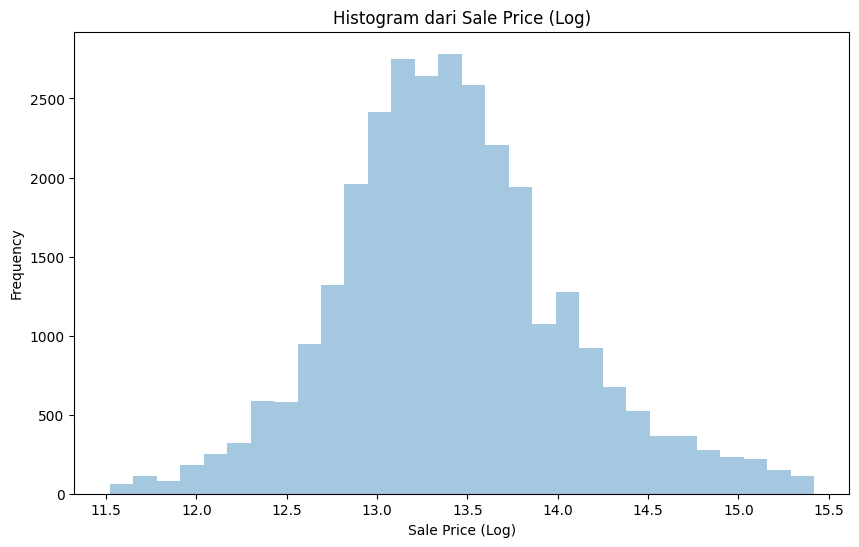

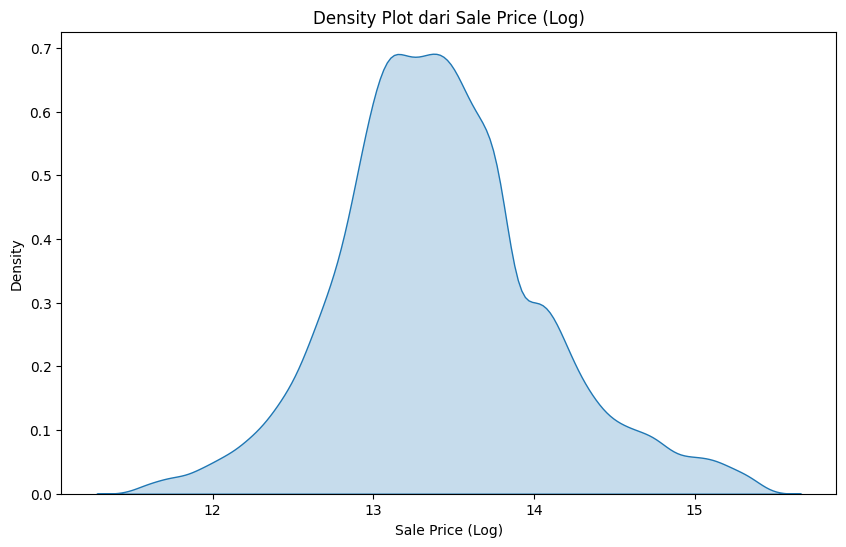

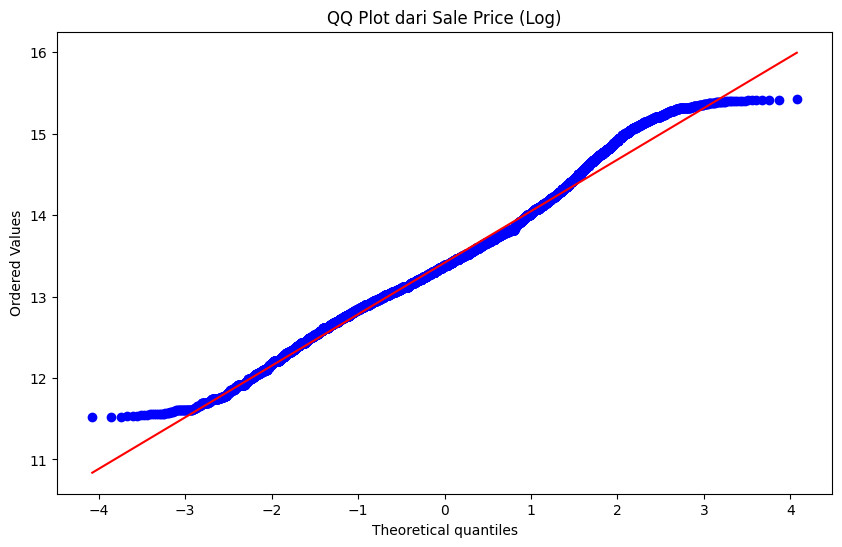

In [37]:
# filter data
data_skewness = data[(data['SALE PRICE']>100000) & (data['SALE PRICE']<5000000)]

# transform data using log
skewness = np.log(data_skewness['SALE PRICE'])

# Plot histogram
plt.figure(figsize=(10,6))
sns.distplot(skewness, kde=False, bins=30)
plt.title('Histogram dari Sale Price (Log)')
plt.xlabel('Sale Price (Log)')
plt.ylabel('Frequency')
plt.show()

# Plot density plot
plt.figure(figsize=(10,6))
sns.kdeplot(skewness, shade=True)
plt.title('Density Plot dari Sale Price (Log)')
plt.xlabel('Sale Price (Log)')
plt.ylabel('Density')
plt.show()

# Plot QQ plot
plt.figure(figsize=(10,6))
stats.probplot(skewness, plot=plt)
plt.title('QQ Plot dari Sale Price (Log)')
plt.show()


- Berdasarkan histogram yang diberikan, terlihat bahwa Sale Price mengikuti distribusi yang lebih normal setelah dilakukan transformasi log.
- Pada grafik Density plot, terlihat bahwa distribusi data Sale Price (Log) cenderung simetris.
- Melihat pada QQ Plot, dengan titik-titik yang mengikuti garis diagonal, dapat disimpulkan bahwa distribusi data Sale Price setelah dilakukan transformasi log cukup sesuai dengan distribusi lognormal.

## Confidence Intervals

In [38]:
data['SALE PRICE'].describe().astype(int)

count         41089
mean        1258914
std        14379380
min               0
25%          145000
50%          520000
75%          865000
max     -2147483648
Name: SALE PRICE, dtype: int32

Sample mean: 833694.2470576435
Sample standard deviation: 664439.6775885883
t-value for 95% confidence interval and degrees of freedom: 1.9600433093004446
Margin of error: 7530.564636331851
95% Confidence interval: (826163.6824213116, 841224.8116939754)


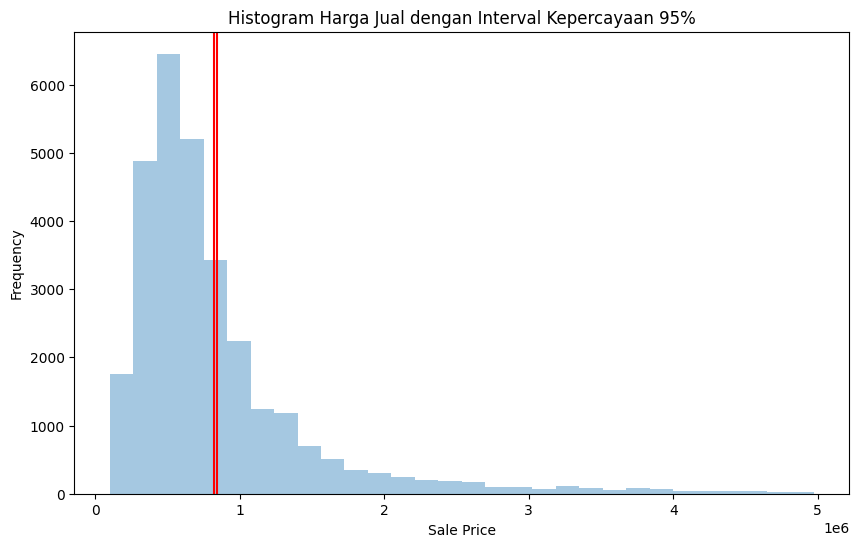

In [44]:
# Filter data
data_c = data[(data['SALE PRICE']>100000) & (data['SALE PRICE']<5000000)]

# Calculate sample mean and standard deviation
sample_mean = data_c['SALE PRICE'].mean()
sample_std = data_c['SALE PRICE'].std()

# Calculate t-value for 95% confidence interval and degrees of freedom
t_value = stats.t.ppf(0.975, len(data_c)-1)

# Calculate margin of error
margin_of_error = t_value * (sample_std / np.sqrt(len(data_c)))

# Calculate confidence interval
conf_int = (sample_mean - margin_of_error, sample_mean + margin_of_error)

# Print results
print("Sample mean:", sample_mean)
print("Sample standard deviation:", sample_std)
print("t-value for 95% confidence interval and degrees of freedom:", t_value)
print("Margin of error:", margin_of_error)
print("95% Confidence interval:", conf_int)

# Plot histogram
plt.figure(figsize=(10,6))
sns.distplot(data_ci['SALE PRICE'], kde=False, bins=30)
plt.axvline(conf_int[0], c='red')
plt.axvline(conf_int[1], c='red')
plt.title('Histogram Harga Jual dengan Interval Kepercayaan 95%')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

Berdasarkan analisis di atas dengan menggunakan tingkat kepercayaan 95% atau alpha 0.05, diperoleh informasi sebagai berikut:

- Margin of error, yaitu seberapa besar variasi nilai sekitar rata-rata sampel untuk tingkat kepercayaan 95%, adalah sebesar 7530.56 dollar.
- Standar deviasi sampel, yang mengukur sejauh mana data tersebar, adalah sebesar 664,439.67 dollar.
- Rata-rata dari sampel data adalah sebesar 833,694.24 dollar.
- Nilai t-value untuk interval kepercayaan 95% dengan derajat kebebasan n-1 adalah 1.960.
- Rentang nilai yang mengandung rata-rata dengan tingkat kepercayaan 95% adalah antara 826,163.68 dollar dan 841,224.81 dollar. Dengan kata lain, kita dapat dengan keyakinan 95% mengatakan bahwa nilai rata-rata sesungguhnya berada di dalam rentang tersebut.

## Hypothesis Testing

Apakah terdapat perbedaan unit terjual diantara properti yang dibangun pada tahun 1991-2000 dan tahun 2001-2010?

Significance level (alpha) : 5% (0.05)

Hipotesis :

H0 (Null Hypothesis) : μ1 = μ2 (tidak terdapat perbedaan unit terjual diantara properti yang dibangun pada tahun 1991-2000 dan pada tahun 2001-2010)

H1 (Alternative Hypothesis) : μ1 ≠ μ2 (terdapat perbedaan unit terjual diantara properti yang dibangun pada tahun 1991-2000 dan pada tahun 2001-2010

In [40]:
data_test = data[['RESIDENTIAL UNITS','YEAR BUILT']]
data_test.head(10)

,RESIDENTIAL UNITS,YEAR BUILT
0,5,1900
1,10,1913
2,6,1900
3,8,1920
4,24,1920
5,10,2009
6,24,1928
7,3,1910
8,4,1900
9,5,1910


In [41]:
data_test["YEAR BUILT"] = data["YEAR BUILT"].astype("float")
data_test1 = data_test[
    (data_test['YEAR BUILT'] > 1991) &
    (data_test['YEAR BUILT'] < 2000)]
data_test1.head()

,RESIDENTIAL UNITS,YEAR BUILT
80,0,1998.0
222,2,1998.0
347,3,1996.0
527,0,1999.0
968,2,1993.0


In [42]:
data_test["YEAR BUILT"] = data["YEAR BUILT"].astype("float")
data_test2 = data_test[
    (data_test['YEAR BUILT'] > 2001) &
    (data_test['YEAR BUILT'] < 2010)]
data_test2.head()

,RESIDENTIAL UNITS,YEAR BUILT
5,10,2009.0
105,0,2007.0
108,0,2008.0
118,0,2007.0
346,3,2002.0


In [43]:
# Menentukan mean dan standar deviasi dari data_test1
n1 = len(data_test1)
mu1 = data_test1['RESIDENTIAL UNITS'].mean()
sd1 = data_test1['RESIDENTIAL UNITS'].std()

# Menentukan mean dan standar deviasi dari data_test2
n2 = len(data_test2)
mu2 = data_test2['RESIDENTIAL UNITS'].mean()
sd2 = data_test2['RESIDENTIAL UNITS'].std()

 
sm.stats.ztest(data_test1['RESIDENTIAL UNITS'], data_test2['RESIDENTIAL UNITS'], alternative='two-sided')

(-2.4383403356625157, 0.014754875184118416)

Karena p-value (1.53e-36) sangat kecil, maka dapat menolak Null Hypothesis bahwa tidak terdapat perbedaan unit terjual diantara properti yang dibangun pada tahun 1991-2000 dengan properti yang dibangun pada tahun 2001-2010.

## Conclusion

- Terdapat perbedaan dalam jumlah unit yang terjual antara kategori kelas properti yang dibangun dari tahun ke tahun di kota New York. Dalam hal ini, penjualan properti cenderung lebih tinggi pada kategori Building Class tertentu seperti One Family Dwellings, Two Family Dwellings, dan Condos.
- Properti yang dibangun pada awal abad ke-20 memiliki harga yang lebih tinggi dibandingkan dengan properti yang lebih baru, yaitu yang dibangun antara tahun 1980-an hingga 2000-an. Hal ini menunjukkan tren harga yang lebih rendah untuk properti yang lebih baru.
- Dilakukan pengujian hipotesis untuk menentukan apakah terdapat perbedaan unit terjual diantara properti yang dibangun pada tahun 1991-2000 dan tahun 2001-2010. Dari hasil pengujian hipotesis dengan tingkat signifikansi 5%, didapatkan bahwa terdapat perbedaan unit terjual diantara properti yang dibangun pada tahun 1991-2000 dengan properti yang dibangun pada tahun 2001-2010.